# Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Get The Data

In [3]:
train_data = pd.read_csv('playground-series-s4e2/train.csv')
test_data = pd.read_csv('playground-series-s4e2/test.csv')
sample_submission = pd.read_csv('playground-series-s4e2/sample_submission.csv')

# View The Data

In [6]:
train_data = train_data.drop(columns=['id'], errors='ignore')
train_data.sample(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
7899,Male,30.722801,1.829757,123.172214,yes,yes,2.967300,3.00000,Sometimes,no,1.979833,no,0.886817,0.173665,Sometimes,Public_Transportation,Obesity_Type_II
3203,Female,25.976209,1.623303,109.207614,yes,yes,3.000000,3.00000,Sometimes,no,1.723372,no,0.027101,0.445495,Sometimes,Public_Transportation,Obesity_Type_III
11722,Female,21.000000,1.650000,75.000000,yes,yes,2.927218,3.00000,Sometimes,no,1.000000,no,0.000000,1.000000,Sometimes,Public_Transportation,Overweight_Level_I
16288,Female,18.424941,1.589100,44.541794,yes,yes,2.910345,3.53009,Sometimes,no,2.792074,no,1.911080,1.931163,Sometimes,Automobile,Insufficient_Weight
13768,Male,30.605225,1.765690,120.000000,yes,yes,2.939727,3.00000,Sometimes,no,3.000000,no,1.079934,1.444532,Sometimes,Public_Transportation,Obesity_Type_II


In [9]:
categorical_cols = train_data.select_dtypes(include=['object']).columns

summary = {col: train_data[col].unique() for col in categorical_cols}
for col, values in summary.items():
    print(f"{col}: {values}")

Gender: ['Male' 'Female']
family_history_with_overweight: ['yes' 'no']
FAVC: ['yes' 'no']
CAEC: ['Sometimes' 'Frequently' 'no' 'Always']
SMOKE: ['no' 'yes']
SCC: ['no' 'yes']
CALC: ['Sometimes' 'no' 'Frequently']
MTRANS: ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
NObeyesdad: ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


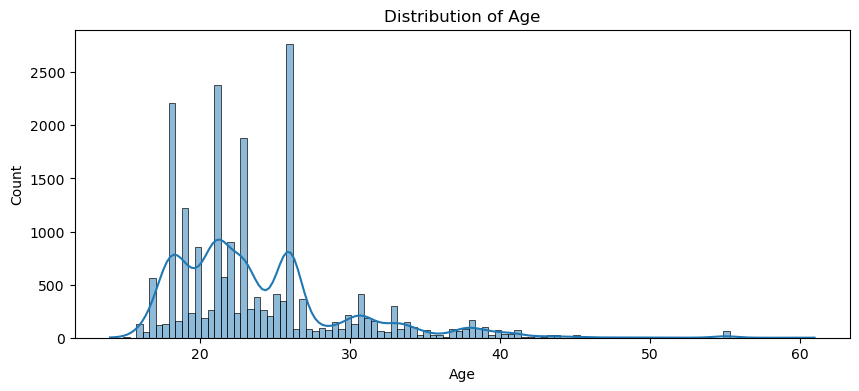

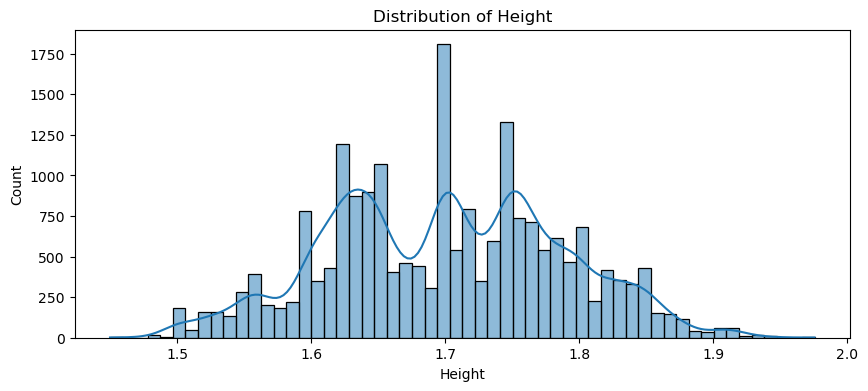

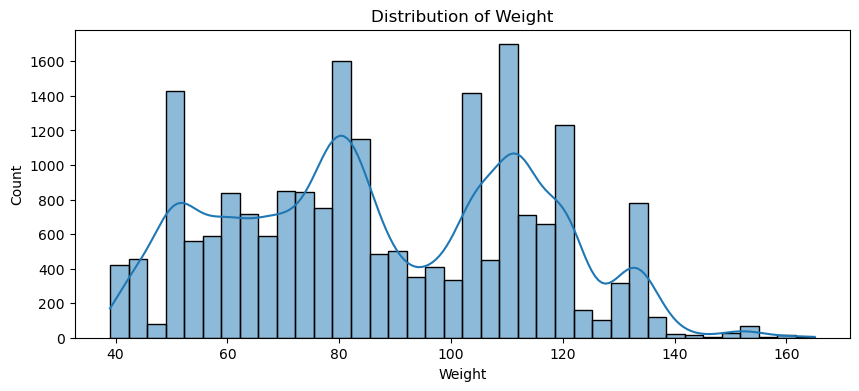

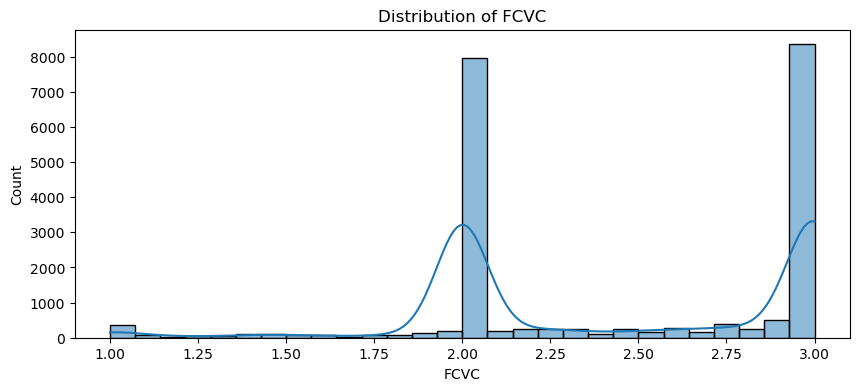

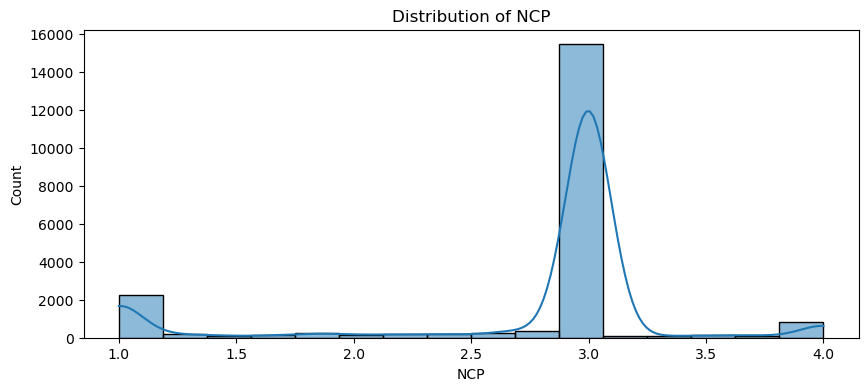

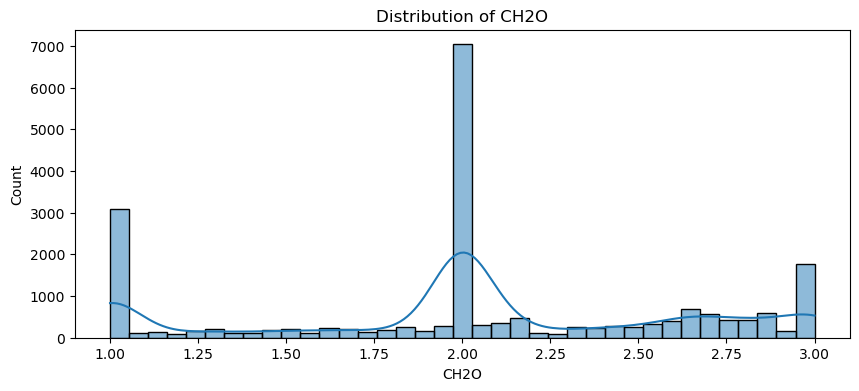

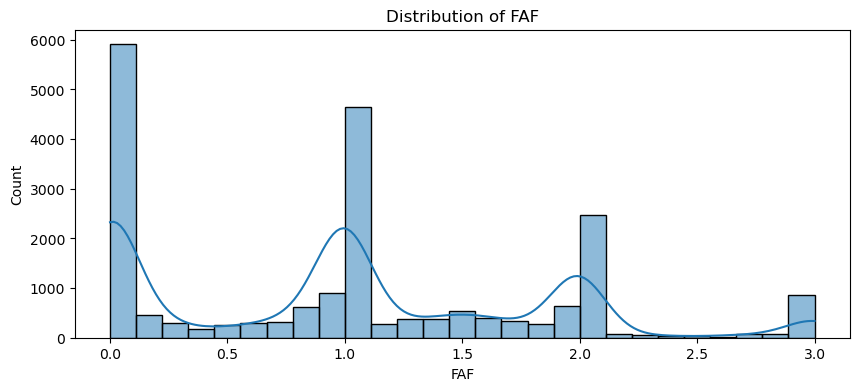

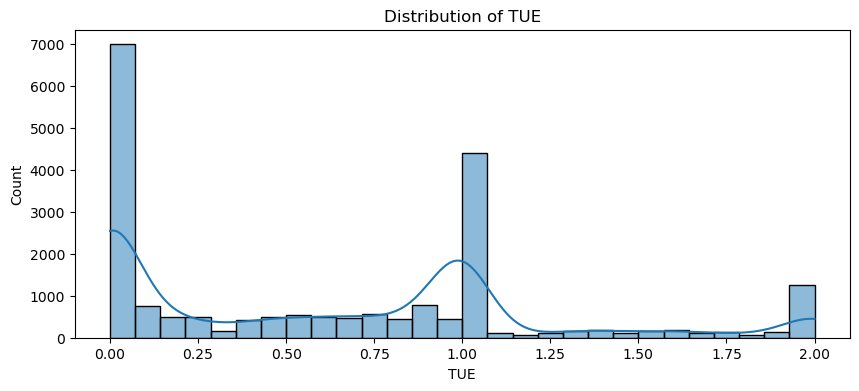

In [18]:
# Plot histograms for numeric columns
for column in train_data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(train_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

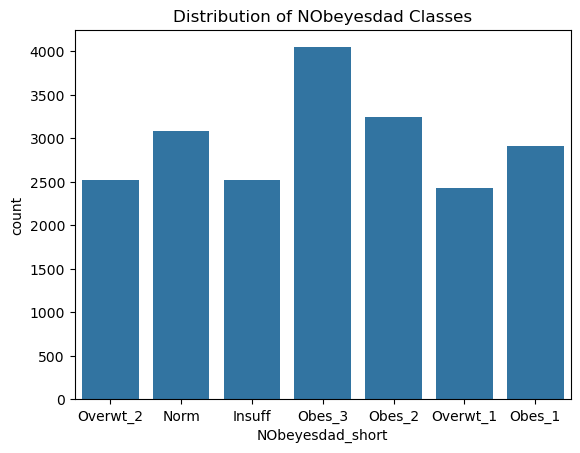

In [19]:
# Define a dictionary for abbreviating long class names
# Define abbreviations for all classes in 'NObeyesdad'
abbreviations = {
    'Insufficient_Weight': 'Insuff',
    'Normal_Weight': 'Norm',
    'Overweight_Level_I': 'Overwt_1',
    'Overweight_Level_II': 'Overwt_2',
    'Obesity_Type_I': 'Obes_1',
    'Obesity_Type_II': 'Obes_2',
    'Obesity_Type_III': 'Obes_3'
}
train_data['NObeyesdad_short'] = train_data['NObeyesdad'].replace(abbreviations)
sns.countplot(x='NObeyesdad_short', data=train_data)
plt.title('Distribution of NObeyesdad Classes')
plt.xticks(rotation=0)
plt.show()


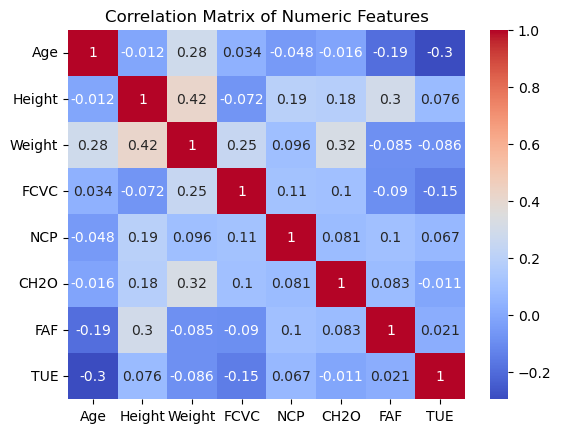

In [20]:
numeric_data = train_data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


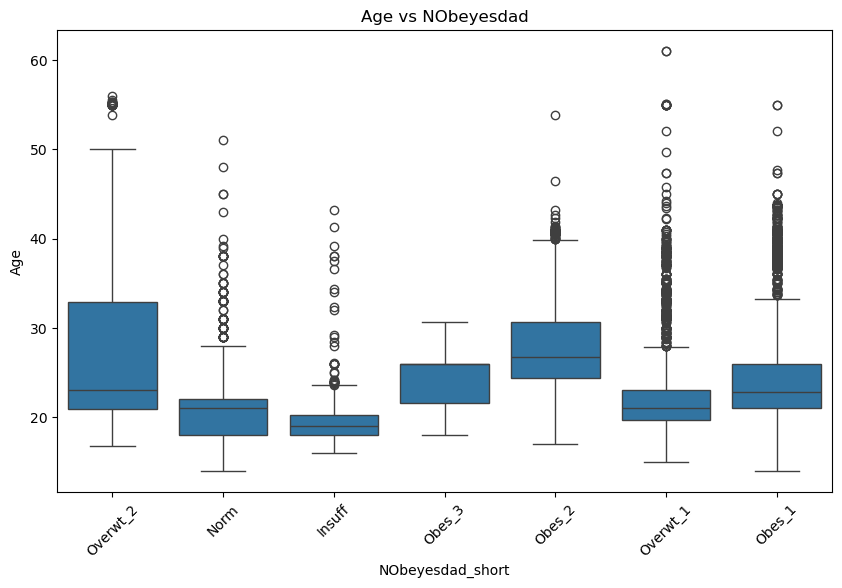

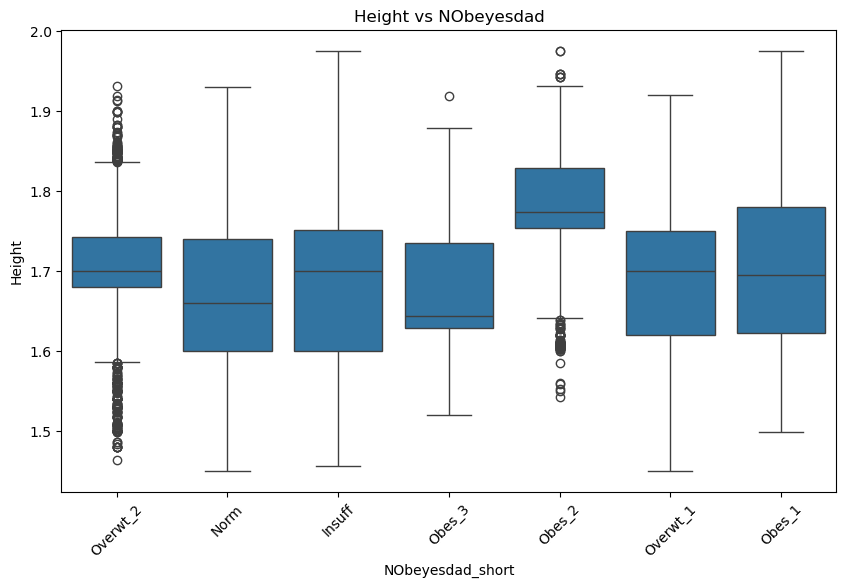

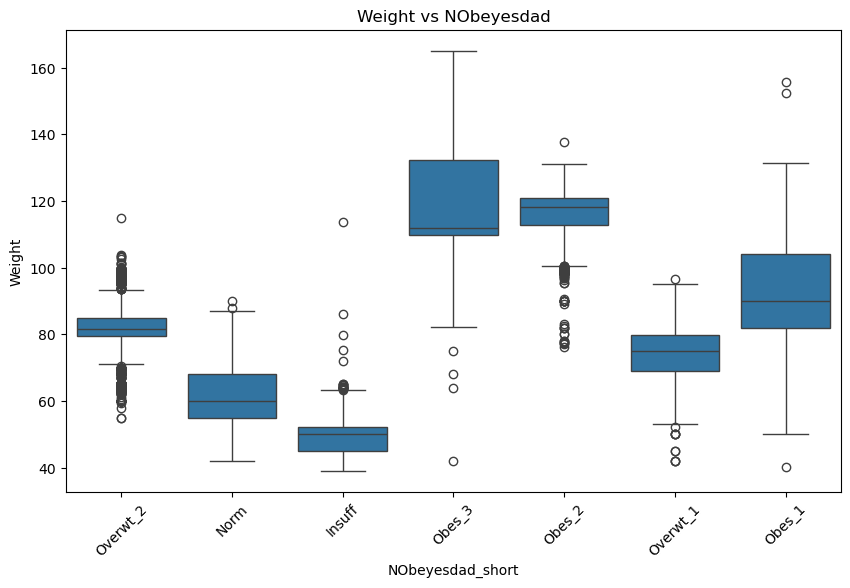

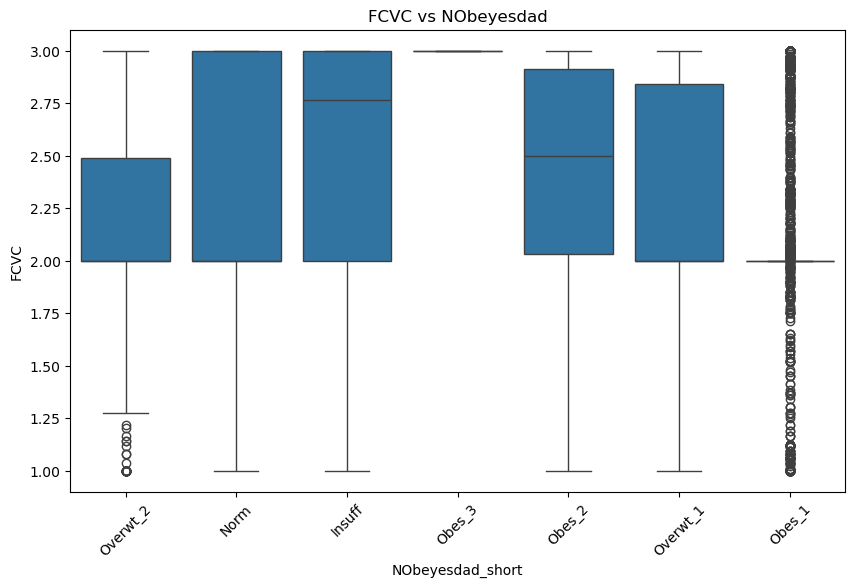

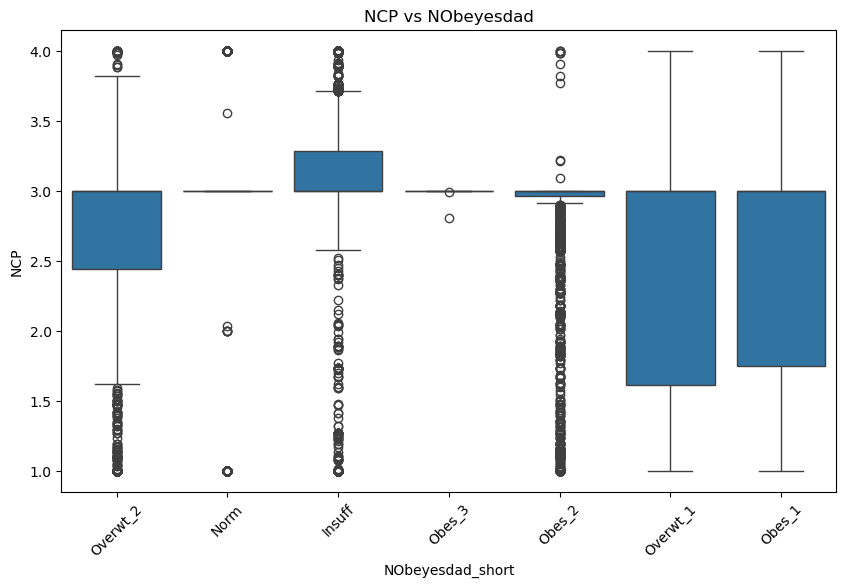

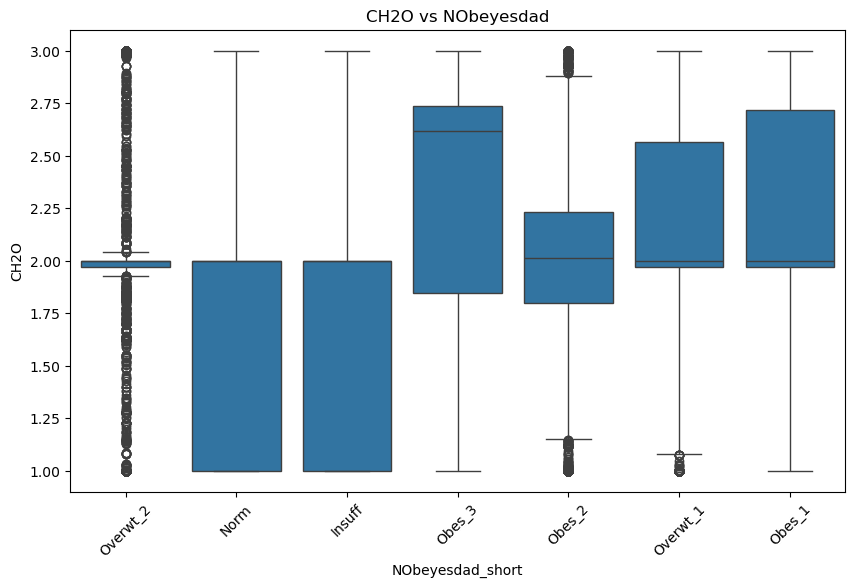

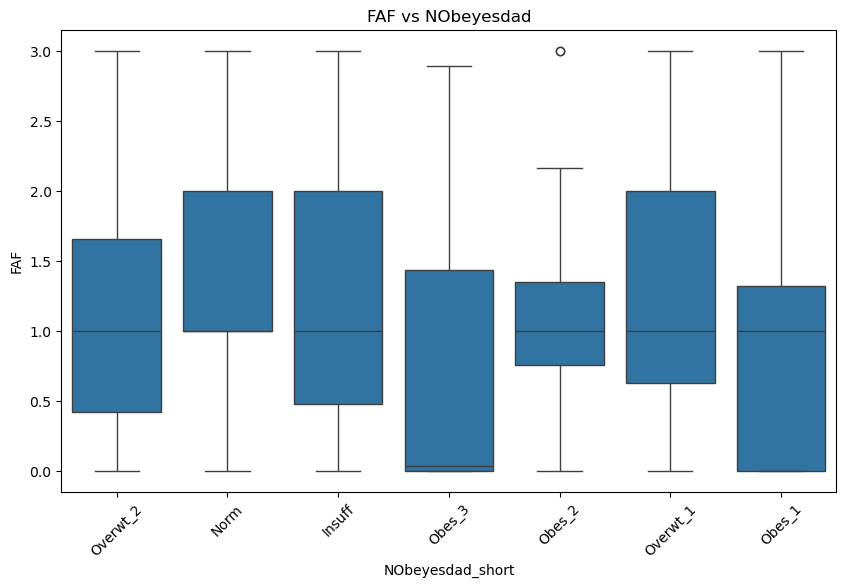

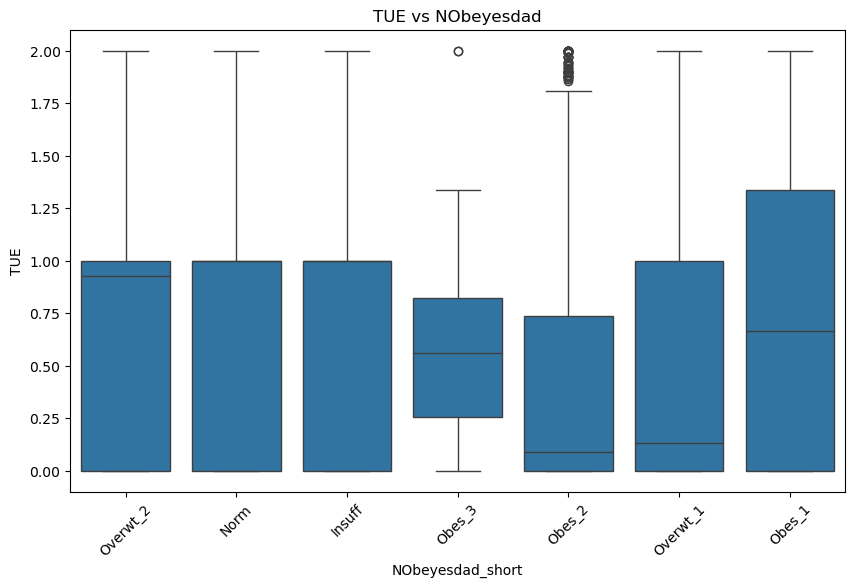

In [21]:
for column in train_data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='NObeyesdad_short', y=column, data=train_data)
    plt.title(f'{column} vs NObeyesdad')
    plt.xticks(rotation=45)
    plt.show()


# Split the Data

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

# Drop any columns that should not be included, e.g., ID or target-related columns
X = train_data.drop(columns=['NObeyesdad_short', 'id'], errors='ignore')
y = train_data['NObeyesdad_short']

# Encode categorical variables in X
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Convert y to numerical codes if needed
if y.dtype == 'object':
    y = y.astype('category').cat.codes

# Stratified train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train with cross-validation to confirm performance
model = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted')
print("Cross-Validation F1 Scores:", cross_val_scores)
print("Mean Cross-Validation F1 Score:", cross_val_scores.mean())

# Fit and evaluate on the validation set for final check
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

# Print classification report
print(classification_report(y_val, y_pred))


Cross-Validation F1 Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       505
           1       1.00      1.00      1.00       617
           2       1.00      1.00      1.00       582
           3       1.00      1.00      1.00       650
           4       1.00      1.00      1.00       809
           5       1.00      1.00      1.00       485
           6       1.00      1.00      1.00       504

    accuracy                           1.00      4152
   macro avg       1.00      1.00      1.00      4152
weighted avg       1.00      1.00      1.00      4152

